In [9]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt

N_SAMPLES = 100

# Displacement Object

In [19]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.Ice(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(np.Infinity, 1, False)
}
pp.InterpolationDef.path_to_tables = "/home/msackel/.local/share/PROPOSAL/"
cross = pp.crosssection.make_std_crosssection(**args)
disp = pp.make_displacement(cross, False)

## Integrand

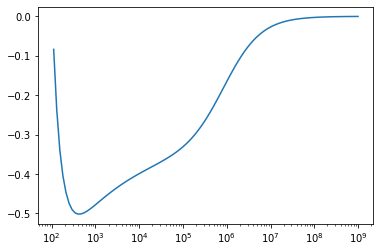

In [15]:
energies = np.geomspace(1.05*args["particle_def"].mass, 1e9, N_SAMPLES)
plt.plot(energies, disp.function_to_integral(energies))
plt.xscale("log")

## Track Integral

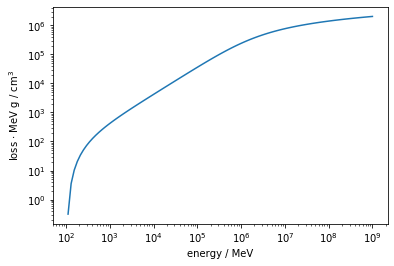

In [16]:
plt.plot(energies, disp.solve_track_integral(energies, args["particle_def"].mass))

plt.ylabel("loss $\cdot$ MeV g / cm$^3$")
plt.xlabel("energy / MeV")
plt.xscale("log")
plt.yscale("log")

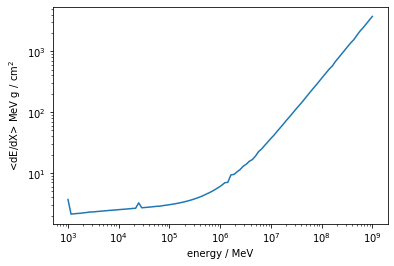

In [17]:
energies = np.geomspace(1e3, 1e9, N_SAMPLES)
distances = 1e0 # 1 cm 

plt.plot(energies, energies - disp.upper_limit_track_integral(energies, distances) / distances)

plt.ylabel("<dE/dX> MeV g / cm$^2$")
plt.xlabel("energy / MeV")
plt.xscale("log")
plt.yscale("log")

## Examples

### How much energy will a 1 TeV muon loes propagate 1000 meter through ice?

In [21]:
energy = 1e6    # internal unit is MeV
distance = 1e5  # internal unit is cm

energy_after_distance = disp.upper_limit_track_integral(energy, distance)

print(f"The particle loses {np.round(energy-energy_after_distance,2)} MeV.")

The particle loses 514052.38 MeV.


### How many meters must a 1 TeV muon propagate to continuously lose half of its energy?

In [7]:
energy = 1e6    # internal unit is MeV

distance = disp.solve_track_integral(energy, 0.5 * energy)

print(f"The particle have to propagate {np.round(distance/100,2)} meter to half its energy.")

The particle have to propagate 967.8 meter to half its energy.


In [8]:
from time import time
start = time()
SAMPLE_SIZE = int(1e7)
disp.upper_limit_track_integral([1e6]*SAMPLE_SIZE, np.ones(SAMPLE_SIZE))
end = time()
print(f"done in {end - start} sec")

done in 35.72533082962036 sec
